<a href="https://colab.research.google.com/github/homeroti/blank-app/blob/main/notebooks/quick_start_with_hugging_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

~~~
Copyright 2025 Google LLC

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
~~~

# Quick start with Hugging Face

<table><tbody><tr>
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/google-health/medgemma/blob/main/notebooks/quick_start_with_hugging_face.ipynb">
      <img alt="Google Colab logo" src="https://www.tensorflow.org/images/colab_logo_32px.png" width="32px"><br> Run in Google Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2Fgoogle-health%2Fmedgemma%2Fmain%2Fnotebooks%2Fquick_start_with_hugging_face.ipynb">
      <img alt="Google Cloud Colab Enterprise logo" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" width="32px"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/google-health/medgemma/blob/main/notebooks/quick_start_with_hugging_face.ipynb">
      <img alt="GitHub logo" src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" width="32px"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://huggingface.co/collections/google/medgemma-release-680aade845f90bec6a3f60c4">
      <img alt="HuggingFace logo" src="https://huggingface.co/front/assets/huggingface_logo-noborder.svg" width="32px"><br> View on HuggingFace
    </a>
  </td>
</tr></tbody></table>

This notebook provides a basic demo of using MedGemma, a collection of Gemma 3 variants that are trained for performance on medical text and image comprehension. MedGemma is intended to accelerate building healthcare-based AI applications.

Learn more about the model at the [HAI-DEF developer site](https://developers.google.com/health-ai-developer-foundations/medgemma).

## Setup

To complete this tutorial, you'll need to have a runtime with [sufficient resources](https://ai.google.dev/gemma/docs/core#sizes) to run the MedGemma model.

You can try out MedGemma 4B for free in Google Colab using a T4 GPU:

1. In the upper-right of the Colab window, select **▾ (Additional connection options)**.
2. Select **Change runtime type**.
3. Under **Hardware accelerator**, select **T4 GPU**.

**Note**: To run the demo with MedGemma 27B in Google Colab, you will need a runtime with an A100 GPU and use 4-bit quantization to reduce memory usage. The performance of quantized versions has not been evaluated.

### Get access to MedGemma

Before you get started, make sure that you have access to MedGemma models on Hugging Face:

1. If you don't already have a Hugging Face account, you can create one for free by clicking [here](https://huggingface.co/join).
2. Head over to the [MedGemma model page](https://huggingface.co/google/medgemma-4b-it) and accept the usage conditions.

### Authenticate with Hugging Face

Generate a Hugging Face `read` access token by going to [settings](https://huggingface.co/settings/tokens).

If you are using Google Colab, add your access token to the Colab Secrets manager to securely store it. If not, proceed to run the cell below to authenticate with Hugging Face.

1. Open your Google Colab notebook and click on the 🔑 Secrets tab in the left panel. <img src="https://storage.googleapis.com/generativeai-downloads/images/secrets.jpg" alt="The Secrets tab is found on the left panel." width=50%>
2. Create a new secret with the name `HF_TOKEN`.
3. Copy/paste your token key into the Value input box of `HF_TOKEN`.
4. Toggle the button on the left to allow notebook access to the secret.

In [1]:
import os
import sys

google_colab = "google.colab" in sys.modules and not os.environ.get("VERTEX_PRODUCT")

if google_colab:
    # Use secret if running in Google Colab
    from google.colab import userdata
    os.environ["HF_TOKEN"] = userdata.get("HF_TOKEN")
else:
    # Store Hugging Face data under `/content` if running in Colab Enterprise
    if os.environ.get("VERTEX_PRODUCT") == "COLAB_ENTERPRISE":
        os.environ["HF_HOME"] = "/content/hf"
    # Authenticate with Hugging Face
    from huggingface_hub import get_token
    if get_token() is None:
        from huggingface_hub import notebook_login
        notebook_login()

### Install dependencies

In [2]:
! pip install --upgrade --quiet accelerate bitsandbytes transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.4 MB/s eta 0:00:00


## Set model variant and configuration

In [7]:
from transformers import BitsAndBytesConfig
import torch

model_variant = "4b-it"  # @param ["4b-it", "27b-text-it"]
model_id = f"google/medgemma-{model_variant}"

use_quantization = True  # @param {type: "boolean"}

# @markdown Set `is_thinking` to `True` to turn on thinking mode. **Note:** Thinking is supported for the 27B variant only.
is_thinking = False  # @param {type: "boolean"}

# If running the 27B variant in Google Colab, check if the runtime satisfies
# memory requirements
if "27b" in model_variant and google_colab:
    if not ("A100" in torch.cuda.get_device_name(0) and use_quantization):
        raise ValueError(
            "Runtime has insufficient memory to run the 27B variant. "
            "Please select an A100 GPU and use 4-bit quantization."
        )

model_kwargs = dict(
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

if use_quantization:
    model_kwargs["quantization_config"] = BitsAndBytesConfig(load_in_4bit=True)

PackageNotFoundError: No package metadata was found for bitsandbytes

## Run inference on images and text

This section demonstrates running inference on image-based tasks using multimodal variants.

**Note:** Proceed to [Run inference on text only](#scrollTo=tcyXG4lTpY4X) if you have selected the 27B text-only variant.

In [4]:
if "text" in model_variant:
    raise ValueError(
        "You are using a text-only variant which does not support multimodal "
        "inputs. Please proceed to the 'Run inference on text only' section."
    )

**Specify image and text inputs**

In [2]:
import os
from PIL import Image
from IPython.display import Image as IPImage, display, Markdown

prompt = "full name of the person"  # @param {type: "string"}

# Image attribution: Stillwaterising, CC0, via Wikimedia Commons
image_url = "/content/PassDeutscher_Goti_1.jpg"  # @param {type: "string"}
! wget -nc -q {image_url}
image_filename = os.path.basename(image_url)
image = Image.open(image_filename)

**Format conversation**

In [3]:
system_instruction = "You are an expert radiologist."

messages = [
    {
        "role": "system",
        "content": [{"type": "text", "text": system_instruction}]
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt},
            {"type": "image", "image": image}
        ]
    }
]

The following standalone examples demonstate how to use the model both directly and with the [`pipeline`](https://huggingface.co/docs/transformers/en/main_classes/pipelines) API. The `pipeline` API provides a simple way to use the model for inference while abstracting away complex details,  while directly using the model gives you complete control over the inference process, including preprocessing and postprocessing. In practice, you should select the method that is best suited for your use case.

**Run model with the `pipeline` API**

In [6]:
from transformers import pipeline

pipe = pipeline(
    "image-text-to-text",
    model=model_id,
    model_kwargs=model_kwargs,
)

pipe.model.generation_config.do_sample = False

NameError: name 'model_id' is not defined

The following generation flags are not valid and may be ignored: ['top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


---

**[ User ]**

give me a list of data fields

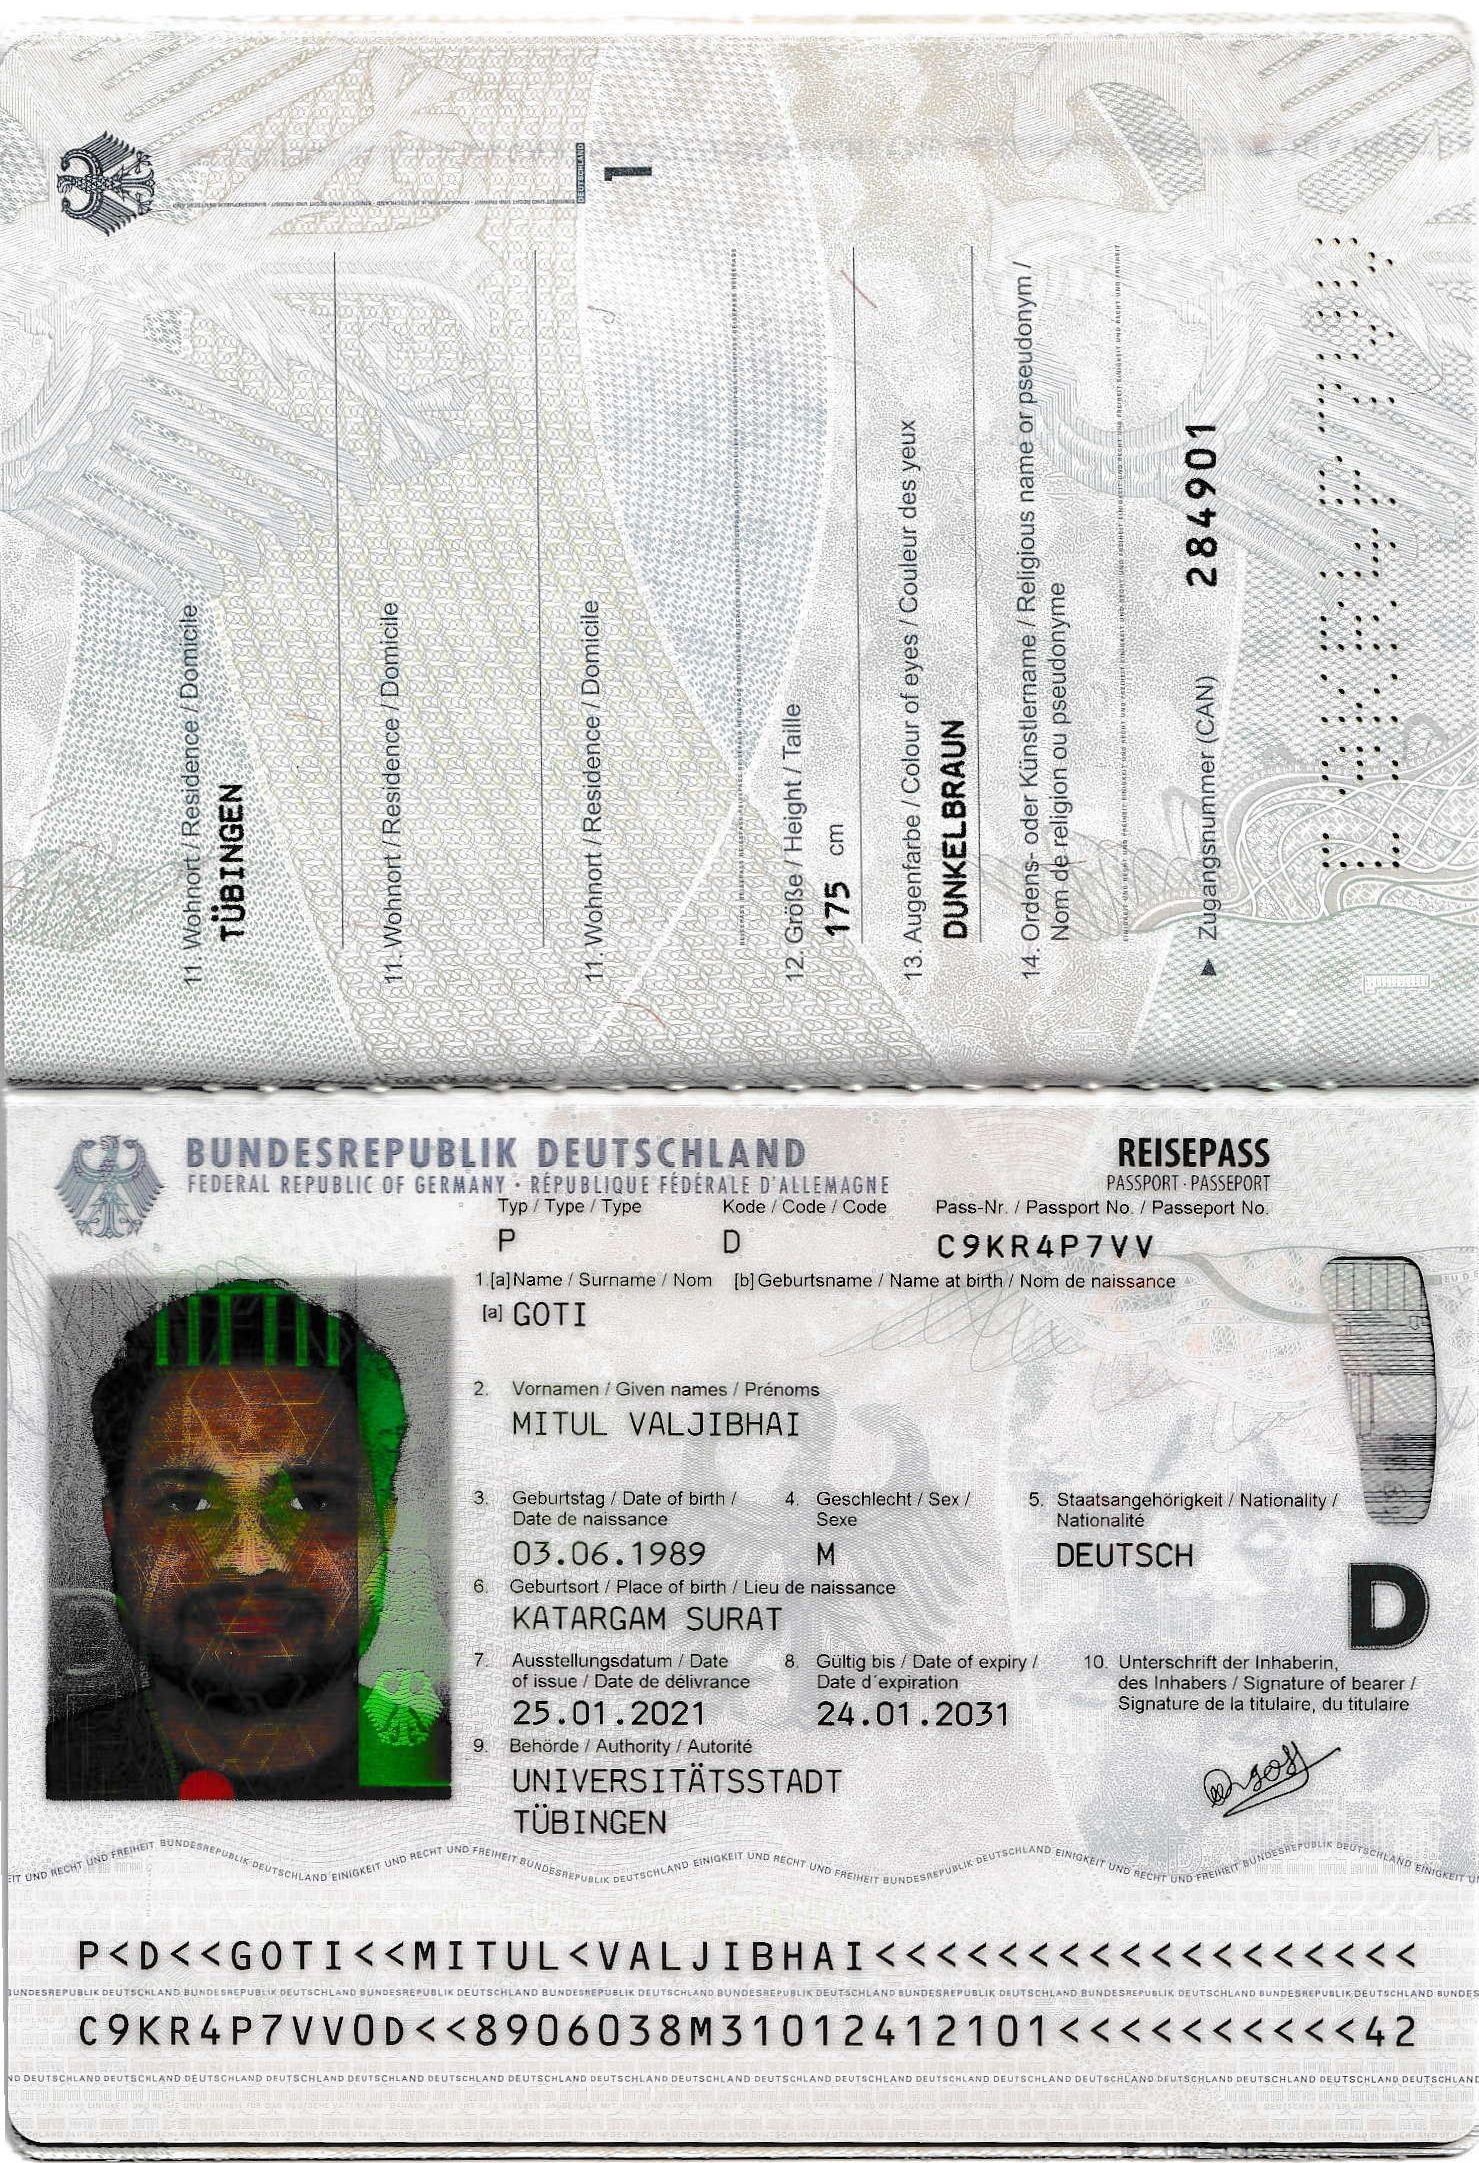

---

**[ MedGemma ]**

Okay, based on the image you provided, here's a list of data fields, categorized for clarity:

**I. Personal Information:**

*   **Name:**
    *   First Name: MUTL
    *   Middle Name: VALJBHAI
    *   Last Name: GOTI
*   **Date of Birth:** 03.06.1989
*   **Place of Birth:** KATARGAM, SURAT
*   **Gender:** M (Male)
*   **Nationality:** NATIONALITY
*   **Address:**
    *   Street Address: TÜBINGEN
    *   City:
    *   Postal Code:
    *   Country:
*   **Date of Issue:** 25.01.2021
*   **Date of Expiry:** 24.01.2031
*   **Passport/ID Type:** REISEPASS (Travel Passport)
*   **Passport/ID Number:** C9KR4P7VV
*   **Signature/Seal:** (Present on the document)

**II. Document Information:**

*   **Document Type:** REISEPASS (Travel Passport)
*   **Issuing Authority:** (Not explicitly stated, but implied to be a German authority)
*   **Document Number:** C9KR4P7VV
*   **Issue Date:**

---

In [8]:
output = pipe(text=messages, max_new_tokens=300)
response = output[0]["generated_text"][-1]["content"]

display(Markdown(f"---\n\n**[ User ]**\n\n{prompt}"))
display(IPImage(filename=image_filename, height=300))
display(Markdown(f"---\n\n**[ MedGemma ]**\n\n{response}\n\n---"))

**Run the model directly**

In [4]:
from transformers import AutoModelForImageTextToText, AutoProcessor

model = AutoModelForImageTextToText.from_pretrained(
    model_id,
    **model_kwargs,
)
processor = AutoProcessor.from_pretrained(model_id)

NameError: name 'model_id' is not defined

In [ ]:
inputs = processor.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt",
).to(model.device, dtype=torch.bfloat16)

input_len = inputs["input_ids"].shape[-1]

with torch.inference_mode():
    generation = model.generate(**inputs, max_new_tokens=300, do_sample=False)
    generation = generation[0][input_len:]

response = processor.decode(generation, skip_special_tokens=True)

display(Markdown(f"---\n\n**[ User ]**\n\n{prompt}"))
display(IPImage(filename=image_filename, height=300))
display(Markdown(f"---\n\n**[ MedGemma ]**\n\n{response}\n\n---"))

## Run inference on text only

This section demonstrates running inference on text-based tasks.

**Specify text prompt and format conversation**

In [11]:
from IPython.display import Markdown

prompt = "Give me the list of entry fields with the data"  # @param {type: "string"}

role_instruction = "You are a helpful form filling assistant."
if "27b" in model_variant and is_thinking:
    system_instruction = f"SYSTEM INSTRUCTION: think silently if needed. {role_instruction}"
    max_new_tokens = 1500
else:
    system_instruction = role_instruction
    max_new_tokens = 500

messages = [
    {
        "role": "system",
        "content": system_instruction
    },
    {
        "role": "user",
        "content": prompt
    }
]

The following standalone examples demonstate how to use the model both directly and with the [`pipeline`](https://huggingface.co/docs/transformers/en/main_classes/pipelines) API. The `pipeline` API provides a simple way to use the model for inference while abstracting away complex details,  while directly using the model gives you complete control over the inference process, including preprocessing and postprocessing. In practice, you should select the method that is best suited for your use case.

**Run model with the `pipeline` API**

In [12]:
from transformers import pipeline

pipe = pipeline(
    "text-generation",
    model=model_id,
    model_kwargs=model_kwargs,
)

pipe.model.generation_config.do_sample = False

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Device set to use cuda:0


In [13]:
output = pipe(messages, max_new_tokens=max_new_tokens)
response = output[0]["generated_text"][-1]["content"]

display(Markdown(f"---\n\n**[ User ]**\n\n{prompt}\n\n---"))
if "27b" in model_variant and is_thinking:
    thought, response = response.split("<unused95>")
    thought = thought.replace("<unused94>thought\n", "")
    display(Markdown(f"**[ MedGemma thinking ]**\n\n{thought}\n\n---"))
display(Markdown(f"**[ MedGemma ]**\n\n{response}\n\n---"))

---

**[ User ]**

Give me the list of entry fields with the data

---

**[ MedGemma ]**

Okay, I understand. To give you a list of entry fields and their associated data, I need to know:

1.  **What form are you referring to?**  Please describe the form, or provide a link to it.  For example:
    *   "A registration form for a conference."
    *   "A customer order form on an e-commerce website."
    *   "A tax return form (e.g., 1040)."
    *   "A job application form."

2.  **What type of data is stored in the form?**
    *   Is it personal information (name, address, email)?
    *   Is it financial information (income, expenses)?
    *   Is it medical information?
    *   Is it something else?

3.  **What is the purpose of the form?** Knowing the purpose can help me understand what kind of data is relevant.

Once I have this information, I can give you a more accurate and helpful response.

**Example:**

Let's say you provide me with the following information:

*   **Form:** A customer order form for an online store.
*   **Data Type:**  Customer information, product details, shipping address, payment information.
*   **Purpose:**  To record and process customer orders.

Based on this, I might provide you with a list like this:

| Entry Field          | Data Type         | Description                                                                                                                            |
| -------------------- | ----------------- | ------------------------------------------------------------------------------------------------------------------------------------ |
| First Name           | Text              | Customer's first name.                                                                                                                    |
| Last Name            | Text              | Customer's last name.                                                                                                                    |
| Email Address        | Text              | Customer's email address (used for order confirmation and communication).                                                                   |
| Shipping Address     | Text              | Street address where the order should be shipped.                                                                                       |
| City                 | Text              | City of the shipping address.                                                                                                           |
| State/Province       | Text              | State or province of the shipping address.                                                                                               |
| Zip/Postal Code     | Text              | Zip code or postal code of the shipping address.                                                                                         |
| Country              | Text              |

---

**Run the model directly**

In [14]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    **model_kwargs,
)
tokenizer = AutoTokenizer.from_pretrained(model_id)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [15]:
inputs = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt",
).to(model.device)

input_len = inputs["input_ids"].shape[-1]

with torch.inference_mode():
    generation = model.generate(**inputs, max_new_tokens=max_new_tokens, do_sample=False)
    generation = generation[0][input_len:]

response = tokenizer.decode(generation, skip_special_tokens=True)

display(Markdown(f"---\n\n**[ User ]**\n\n{prompt}\n\n---"))
if "27b" in model_variant and is_thinking:
    thought, response = response.split("<unused95>")
    thought = thought.replace("<unused94>thought\n", "")
    display(Markdown(f"**[ MedGemma thinking ]**\n\n{thought}\n\n---"))
display(Markdown(f"**[ MedGemma ]**\n\n{response}\n\n---"))

The following generation flags are not valid and may be ignored: ['top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


---

**[ User ]**

Give me the list of entry fields with the data

---

**[ MedGemma ]**

Okay, I need more information to give you a helpful list of entry fields with data.  Please tell me:

*   **What form are you referring to?** (e.g., a tax form, a job application, a medical questionnaire, a registration form, etc.)
*   **What is the context of the form?** (e.g., what is the form for, who is filling it out, where is it being used?)
*   **Do you have a sample of the form?** (If so, please provide it. Even a screenshot would be helpful.)

Once I have this information, I can provide a more accurate and helpful list of entry fields with data.

For example, if you tell me it's a job application, I can give you a list like this:

**Job Application Form**

*   **First Name:** John
*   **Last Name:** Doe
*   **Email:** john.doe@example.com
*   **Phone Number:** 555-123-4567
*   **Address:** 123 Main Street, Anytown, USA
*   **City:** Anytown
*   **State:** CA
*   **Zip Code:** 91234
*   **Date of Birth:** 1985-03-15
*   **Education:** Bachelor of Science in Computer Science, University of Example
*   **Work Experience:**
    *   **Job Title:** Software Engineer
    *   **Company:** Example Corp
    *   **Dates of Employment:** 2015-06-01 to Present
    *   **Responsibilities:** Developed and maintained software applications.
*   **Skills:** Java, Python, SQL, Agile Development
*   **References:** (List of names and contact information)

I look forward to helping you!


---

# Next steps

Explore the other [notebooks](https://github.com/google-health/medgemma/blob/main/notebooks) to learn what else you can do with the model.